# Lending Club Case study

## Import Libreries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read dataset

In [2]:
df = pd.read_csv("loan.csv")
df.head(5)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
print(df.shape)  # get dataset shape

(39717, 111)


In [4]:
print(df["member_id"].nunique())
print(df["id"].nunique())

39717
39717


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
# null value percentage in each column
null_percentage = df.isnull().mean() * 100
for col, percentage in null_percentage.items():
    print(col, ":", percentage)
#To display all columns with respective null values percentage

id : 0.0
member_id : 0.0
loan_amnt : 0.0
funded_amnt : 0.0
funded_amnt_inv : 0.0
term : 0.0
int_rate : 0.0
installment : 0.0
grade : 0.0
sub_grade : 0.0
emp_title : 6.191303472064859
emp_length : 2.7066495455346575
home_ownership : 0.0
annual_inc : 0.0
verification_status : 0.0
issue_d : 0.0
loan_status : 0.0
pymnt_plan : 0.0
url : 0.0
desc : 32.58050708764509
purpose : 0.0
title : 0.027695948838029054
zip_code : 0.0
addr_state : 0.0
dti : 0.0
delinq_2yrs : 0.0
earliest_cr_line : 0.0
inq_last_6mths : 0.0
mths_since_last_delinq : 64.66248709620565
mths_since_last_record : 92.98537150338646
open_acc : 0.0
pub_rec : 0.0
revol_bal : 0.0
revol_util : 0.12589067653649572
total_acc : 0.0
initial_list_status : 0.0
out_prncp : 0.0
out_prncp_inv : 0.0
total_pymnt : 0.0
total_pymnt_inv : 0.0
total_rec_prncp : 0.0
total_rec_int : 0.0
total_rec_late_fee : 0.0
recoveries : 0.0
collection_recovery_fee : 0.0
last_pymnt_d : 0.1787647606818239
last_pymnt_amnt : 0.0
next_pymnt_d : 97.12969257496789
last_

In [7]:
# list of cloumns with null values  greater than 40% 
null_col = []
for col, percentage in null_percentage.items():
    if percentage > 40:
        null_col.append(col)

In [8]:
df1 = df.drop(null_col,axis = 1) # drop columns with null value percentage  >  40%

In [9]:
df1.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [10]:
df1.shape

(39717, 54)

In [11]:
#  check total number of unique values in each column
df1.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [12]:
df1["url"][0]

'https://lendingclub.com/browse/loanDetail.action?loan_id=1077501'

#### Drop Columns with unnecessary data-
##### id: id and member_id are unique id for each lender and both can be dropped.
##### url: this column does not add any value for analysis.
#### desc and title: The number of unique values of these 2 columns are present in very large number and also since purpose is a column which also tells us about why the loan was taken and number of unique values of purpose column is 14 therefore we can drop the desc and title columns and move ahead with purpose column for analysis.

In [13]:
df1 = df1.drop(['id','member_id','url','desc','title'], axis = 1)

In [14]:
# list of columns having single unique value
drop_col = []     
for cols in df1.columns:    
    if df1[cols].nunique() == 1:
        drop_col.append(cols)
print(drop_col)

['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


## Drop columns with only single unique value as these columns will not help in data analysis

In [15]:
df1 = df1.drop(drop_col,axis = 1)
df1.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [16]:
# null value percentage in each column
null_percentage = df1.isnull().mean() * 100
print(null_percentage)

loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_title                  6.191303
emp_length                 2.706650
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
purpose                    0.000000
zip_code                   0.000000
addr_state                 0.000000
dti                        0.000000
delinq_2yrs                0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0.000000
revol_util                 0.125891
total_acc                  0.000000
out_prncp                  0

In [17]:
df1.shape

(39717, 40)

In [18]:
#Drop null values as null values present are very few
df2 = df1.dropna()
df2.shape

(36442, 40)

## loan-status is the target column for analysis.

In [19]:
df2.loan_status.unique()

array(['Charged Off', 'Fully Paid', 'Current'], dtype=object)

## Removing Outliers

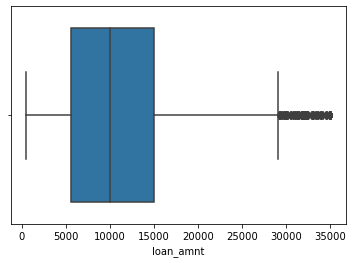

In [20]:
sns.boxplot(df2.loan_amnt)
plt.show()

In [21]:
#Find upper whisker for above boxplot
q1=np.percentile(df2["loan_amnt"],25)
q3=np.percentile(df2["loan_amnt"],75)
iqr = q3-q1
upper_whisker=q3+1.5*iqr
print(upper_whisker)

29100.0


In [22]:
#Removing rows from dataframe with loan_amnt value above 29100
df2 = df2[df2["loan_amnt"]<29100]

In [23]:
df2.shape

(35299, 40)

In [24]:
df2.loan_amnt.describe()

count    35299.000000
mean     10605.657384
std       6416.674912
min        500.000000
25%       5500.000000
50%       9600.000000
75%      15000.000000
max      29000.000000
Name: loan_amnt, dtype: float64

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35299 entries, 1 to 39680
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                35299 non-null  int64  
 1   funded_amnt              35299 non-null  int64  
 2   funded_amnt_inv          35299 non-null  float64
 3   term                     35299 non-null  object 
 4   int_rate                 35299 non-null  object 
 5   installment              35299 non-null  float64
 6   grade                    35299 non-null  object 
 7   sub_grade                35299 non-null  object 
 8   emp_title                35299 non-null  object 
 9   emp_length               35299 non-null  object 
 10  home_ownership           35299 non-null  object 
 11  annual_inc               35299 non-null  float64
 12  verification_status      35299 non-null  object 
 13  issue_d                  35299 non-null  object 
 14  loan_status           

### Converting columns datatype to a correct datatype

In [26]:
df2["int_rate"]

1        15.27%
3        13.49%
4        12.69%
5         7.90%
6        15.96%
          ...  
39551    10.91%
39562    10.28%
39623    12.49%
39666    11.22%
39680    11.86%
Name: int_rate, Length: 35299, dtype: object

In [27]:
df2["int_rate"] = df2["int_rate"].str.replace('%','')
df2["int_rate"] = df2["int_rate"].astype('float64')

In [28]:
df2["issue_d"].unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Aug-07'], dtype=object)

## Derived Column

In [29]:
#We will derive a new column from issue_d where new column will contain information about the month in which loan was funded

In [30]:
df2["issue_month"] = df2["issue_d"].apply(lambda x: x[0:3])

In [31]:
df2["issue_month"].unique()

array(['Dec', 'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr',
       'Mar', 'Feb', 'Jan'], dtype=object)

### Dividing other columns into 2 types: numerical and categorical as for both types method of doing data analysis will be different

In [32]:
obj_col = []
num_col = []
for cols in df2.columns:
    if df2[cols].dtype == 'object':
        obj_col.append(cols)
    else:
        num_col.append(cols)
print(obj_col)
print(num_col)

['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'earliest_cr_line', 'revol_util', 'last_pymnt_d', 'last_credit_pull_d', 'issue_month']
['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies']


### Drop columns issue_d, zip_code, earliest_cr_line, emp__title, revol_util, last_pymnt_d, last_cred_pull_d from cat_col as by looking at the data dictionary provided these columns dont fall under categorical columns and also it will not help in analysing that if the loan is provided then it will be fully paid back or charged off. Also we will drop column loan_status as it is the target column

In [33]:
cat_col = [x for x in obj_col if x not in 
          ["issue_d","zip_code","earliest_cr_line","emp_title","revol_util","last_pymnt_d","last_credit_pull_d","loan_status"]]

In [34]:
cat_col

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'purpose',
 'addr_state',
 'issue_month']

## Univariate Analysis

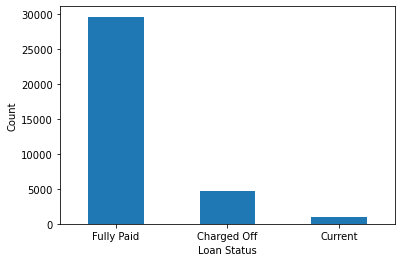

In [35]:
df2["loan_status"].value_counts().plot.bar()
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.xticks(rotation = 360)
plt.show()

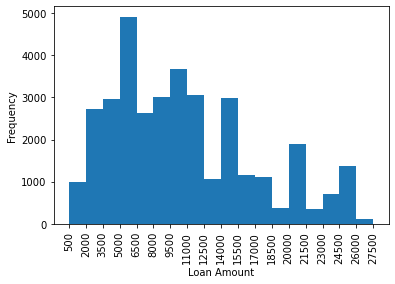

In [36]:
bins = np.arange(500,29000,1500)
plt.hist(df2["loan_amnt"],bins=bins)
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.xticks(bins,rotation=90)
plt.show()

### From above histogram we can say that most of the loans are given for smaller loan amounts where most of the laons are for loan amount 5000-6500

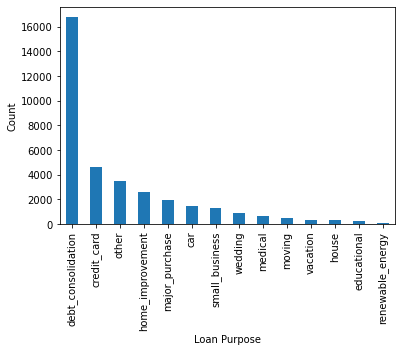

In [37]:
df2["purpose"].value_counts().plot.bar()
plt.xlabel("Loan Purpose")
plt.ylabel("Count")
plt.show()

### Most of the loans are taken for debt_consolidation purpose

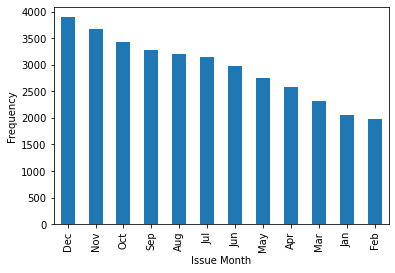

In [38]:
df2["issue_month"].value_counts().plot.bar()
plt.xlabel("Issue Month")
plt.ylabel("Frequency")
plt.show()

## From above barplot we can say that most of the loans are issued in the month of December.

## Bivariate Analysis

In [39]:
def box_plot(x,y,figsize=(6,4)):
    plt.figure(figsize=figsize)
    sns.boxplot(x = x, y = y)
    plt.show()   

In [40]:
def count_plot(x,hue,figsize=(6,4)):
    plt.figure(figsize=figsize)
    sns.countplot(x=x,hue=hue,data=df2)
    plt.xticks(rotation=90)
    plt.show()

In [41]:
def heat_map(x,y,figsize=(6,4)):
    crosstab = pd.crosstab(x,y)
    plt.figure(figsize=figsize)
    sns.heatmap(crosstab,annot=True,cmap="viridis",annot_kws={"size":10})
    plt.show()

In [42]:
len(cat_col)

9

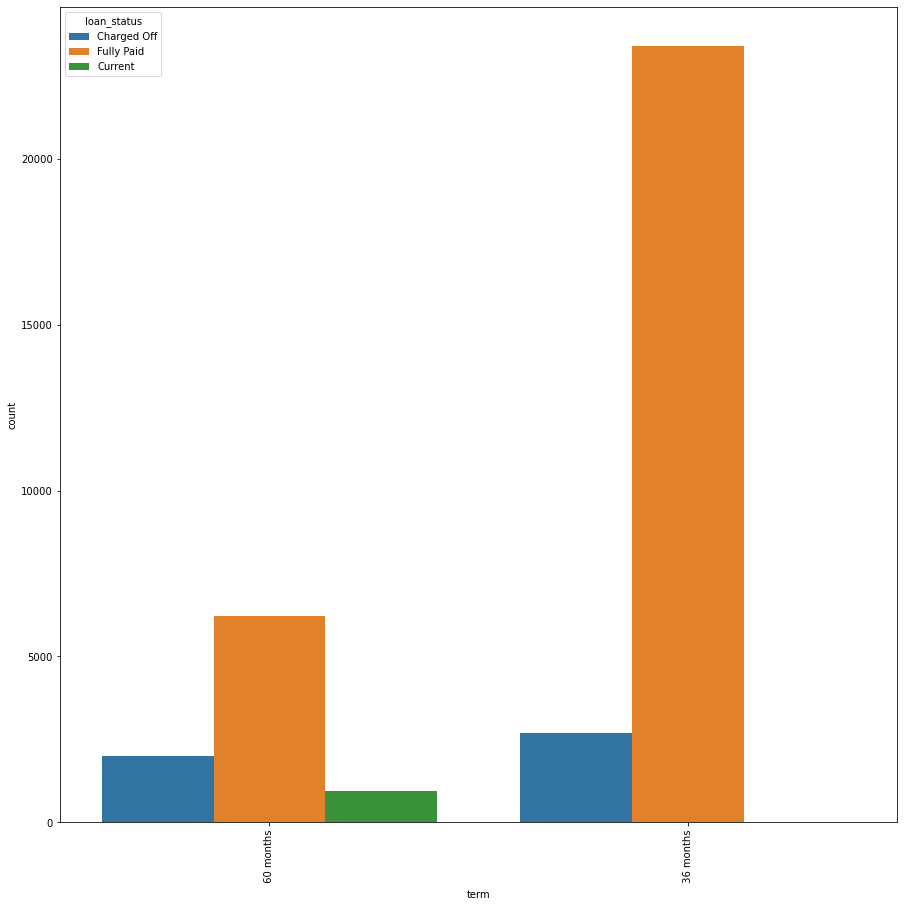

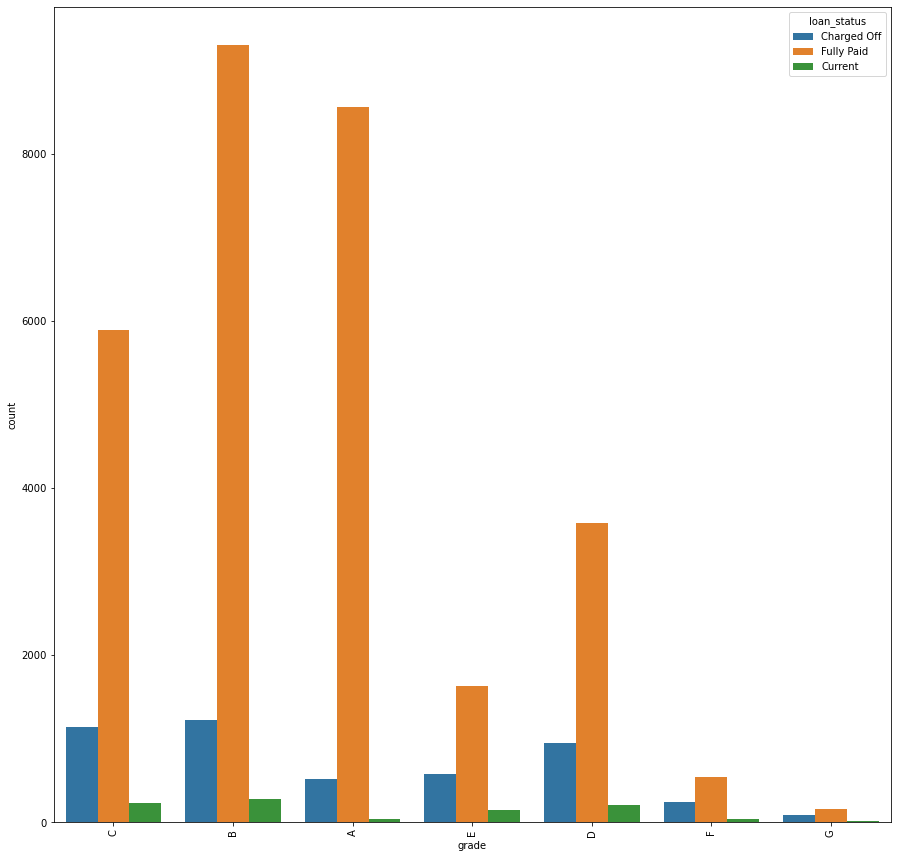

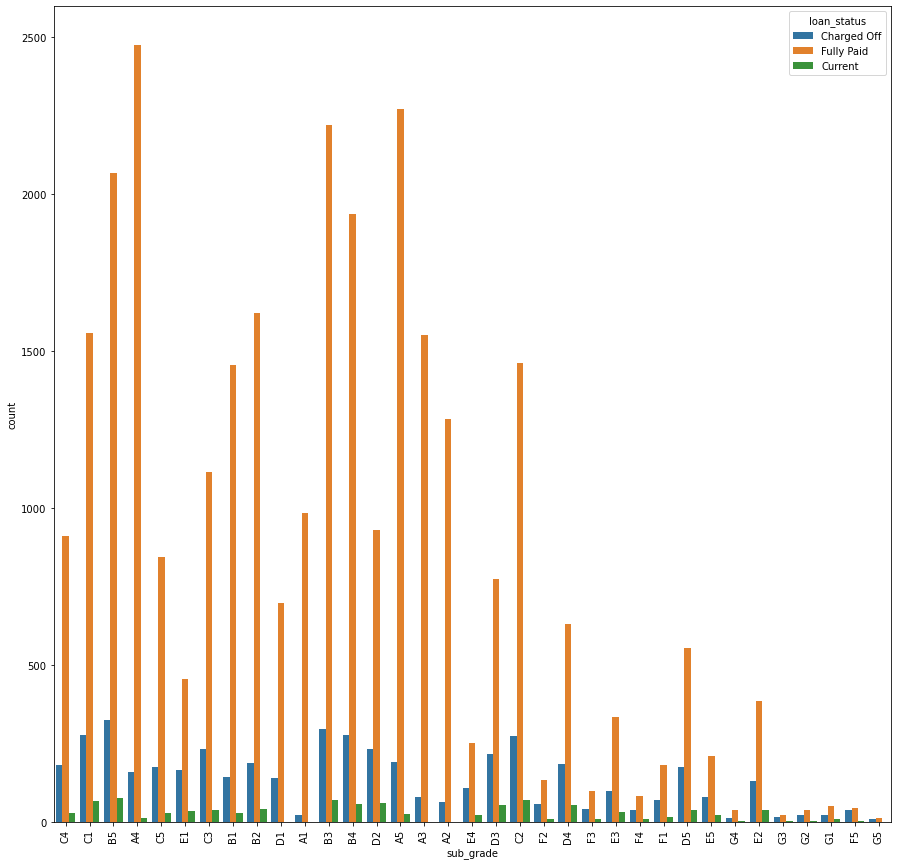

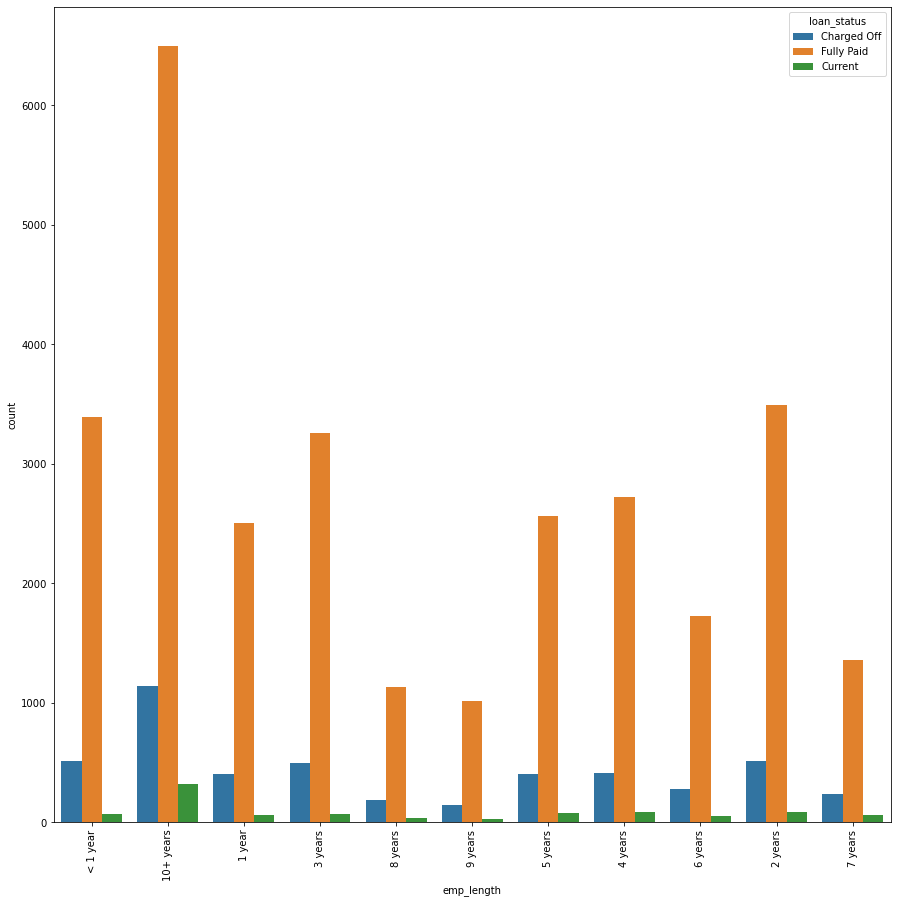

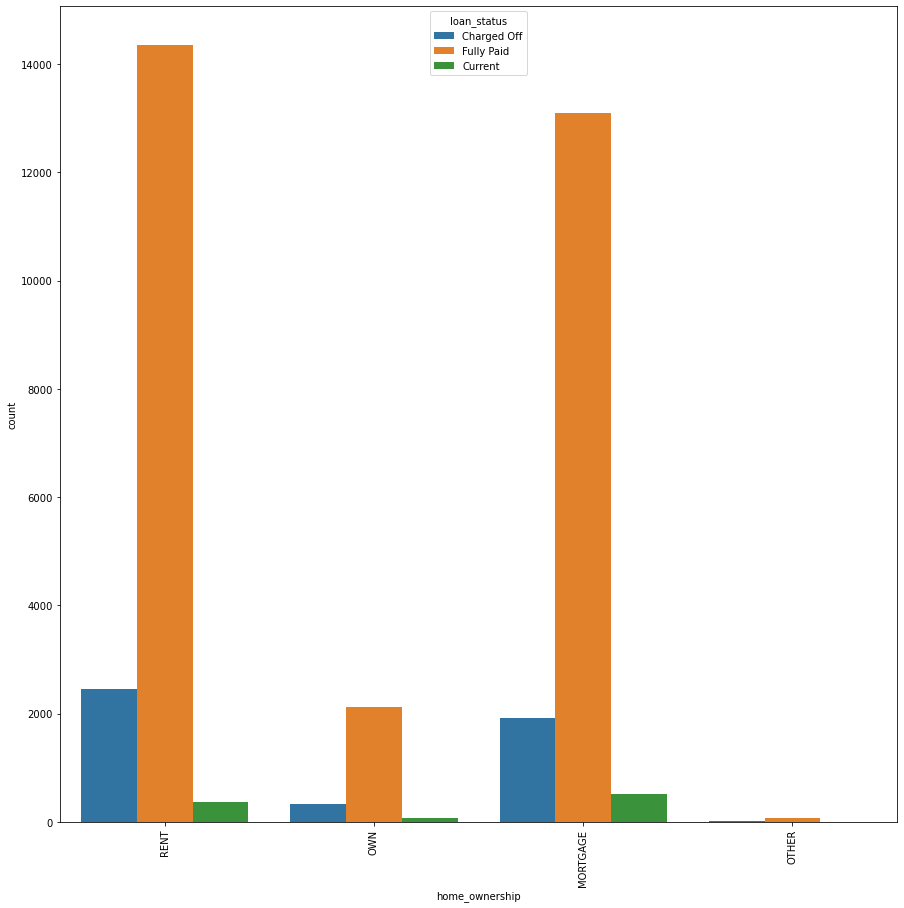

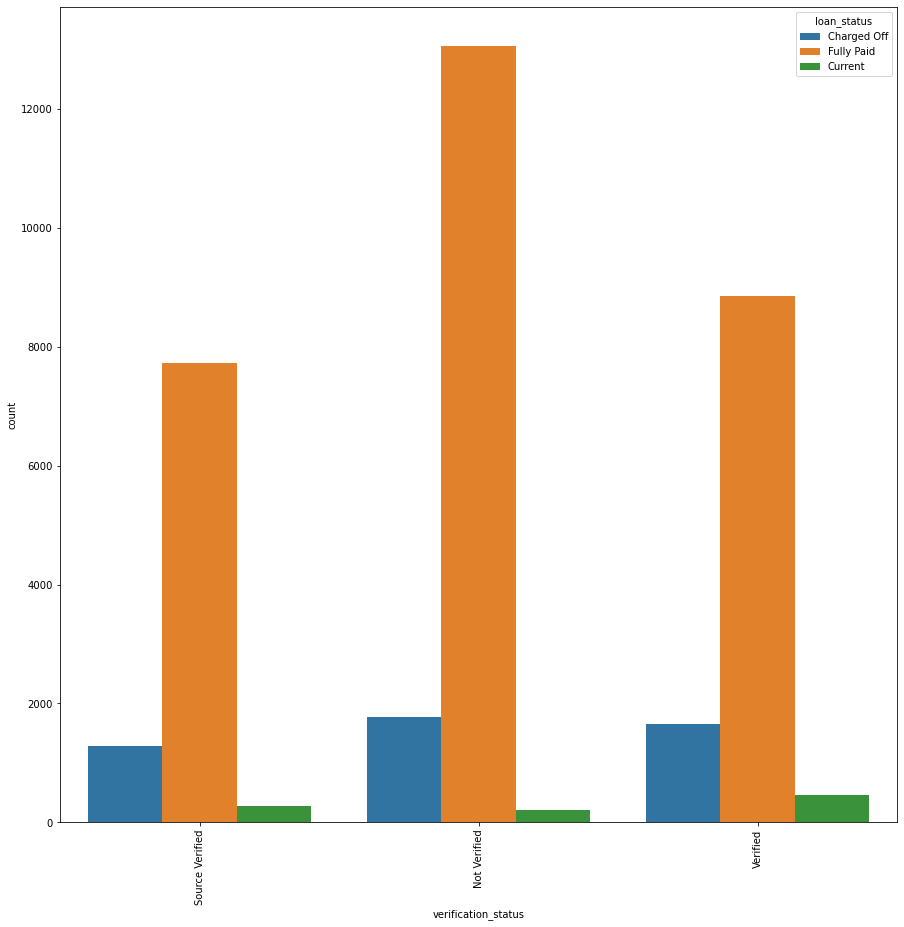

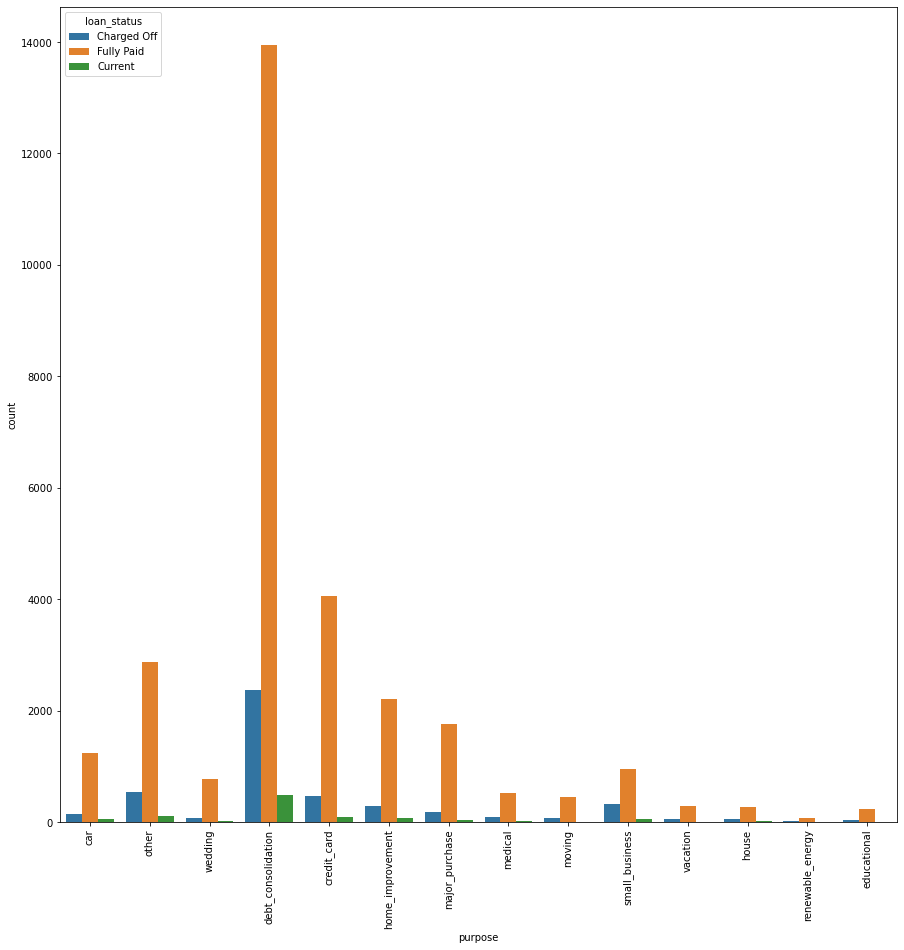

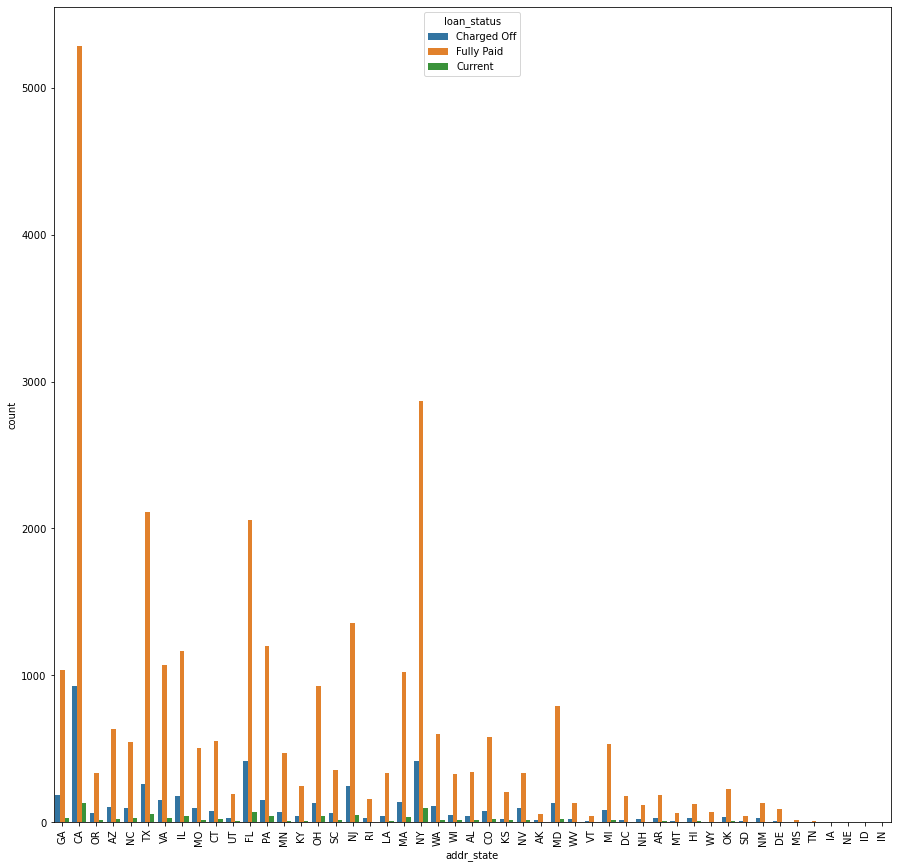

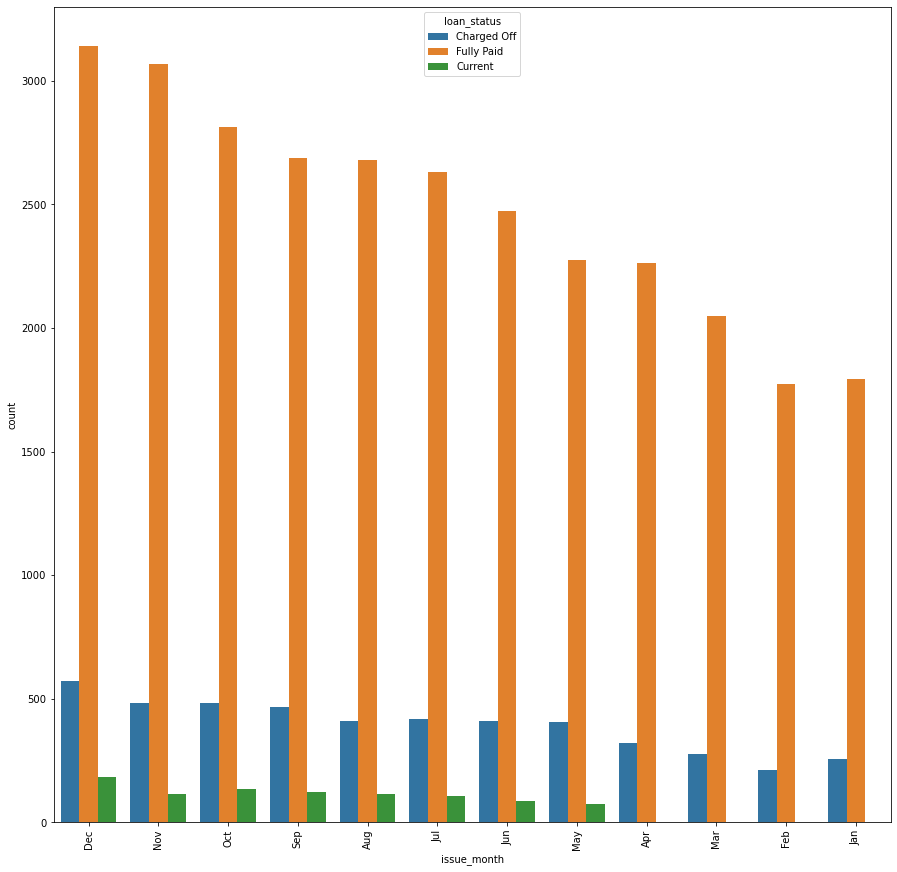

In [43]:
#Relationship of target column loan_status with categorical columns
for i in cat_col:
    count_plot(df2[i],df2["loan_status"],(15,15))

## From the above boxplots and data dictionary we can say that loan_status is fully paid or charged off depends on term column, grade column, emp_length, home_ownership, verification_status, purpose and addr_state.

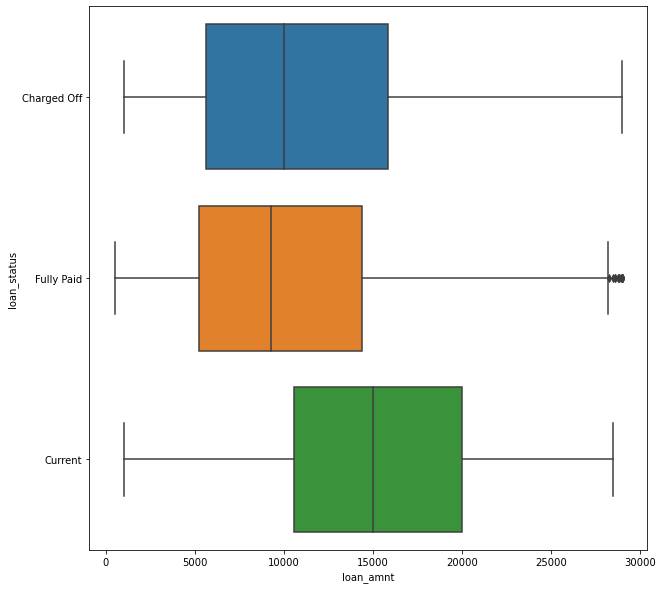

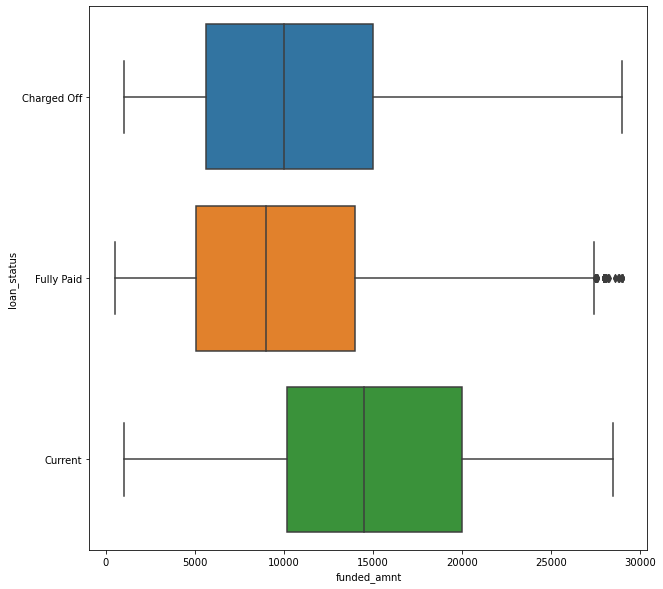

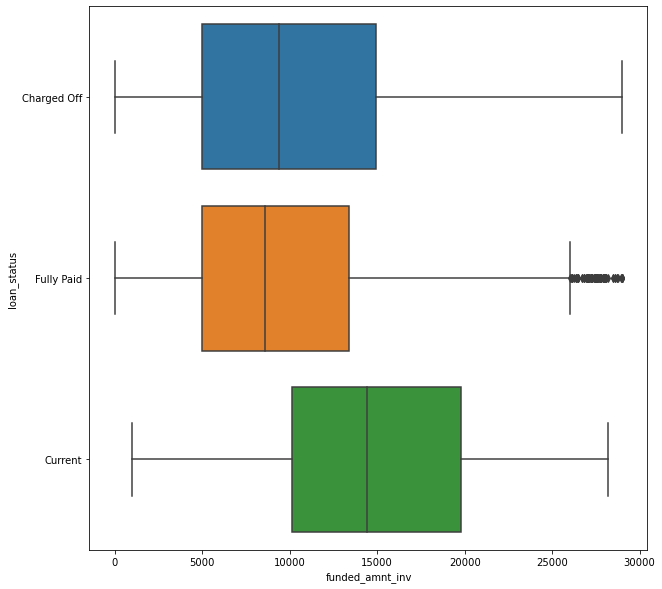

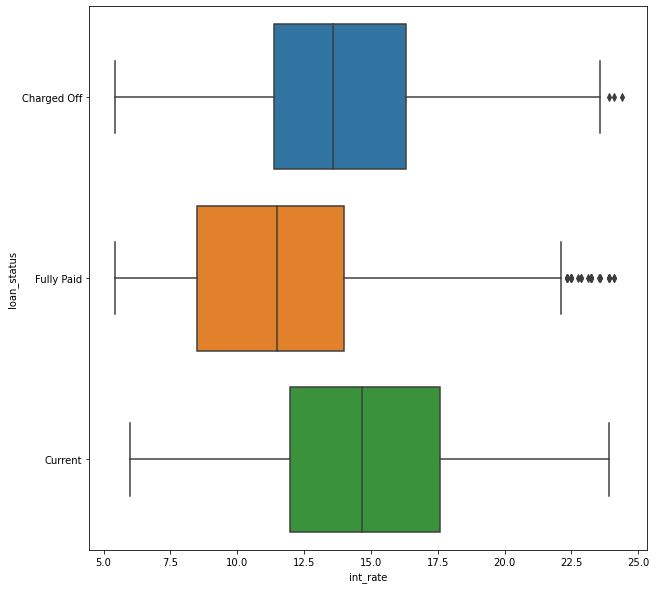

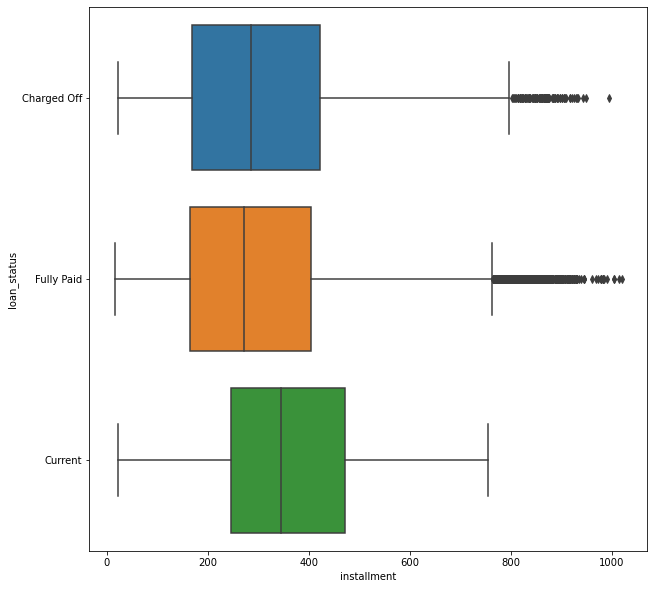

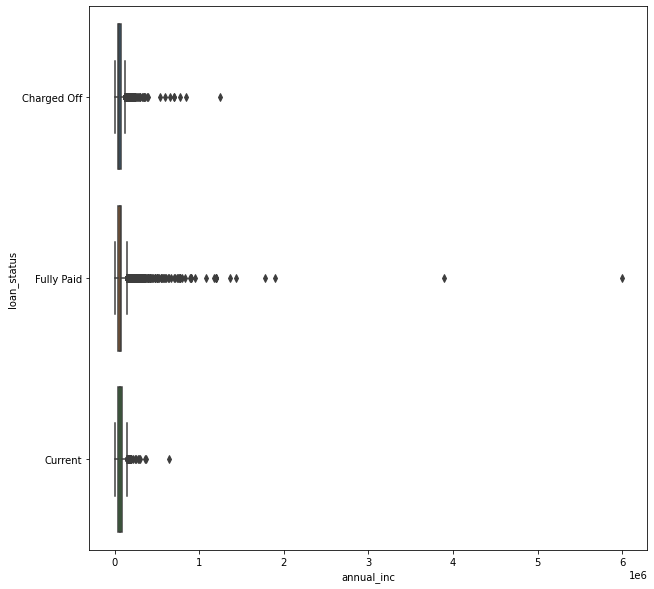

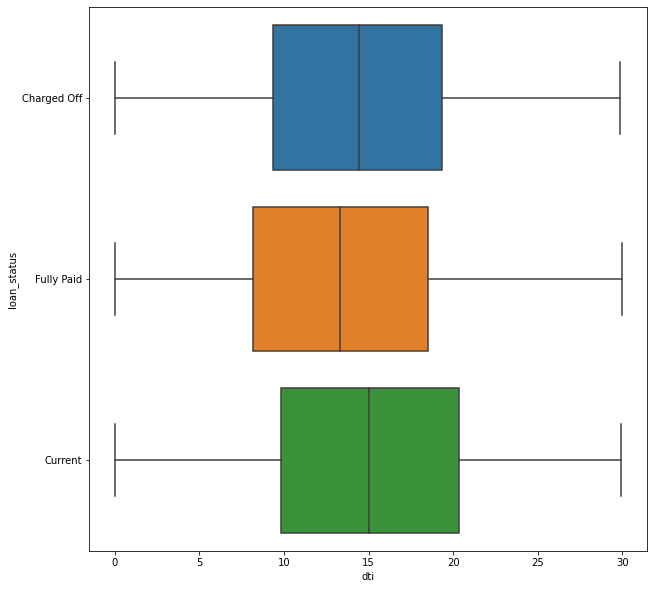

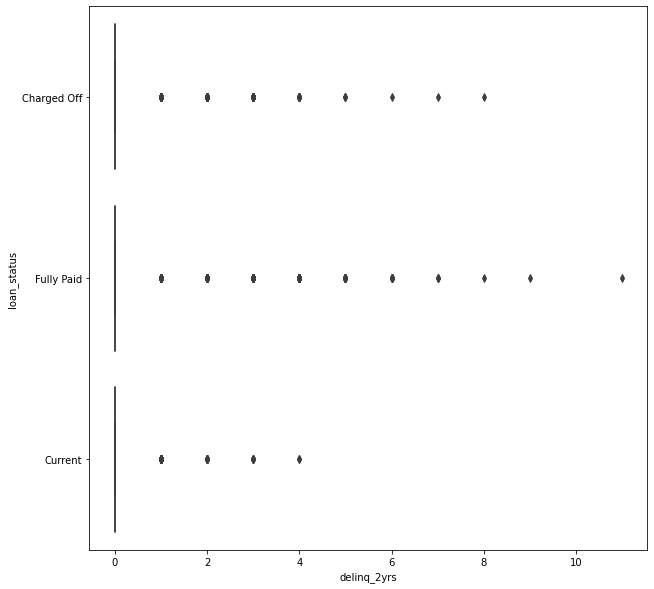

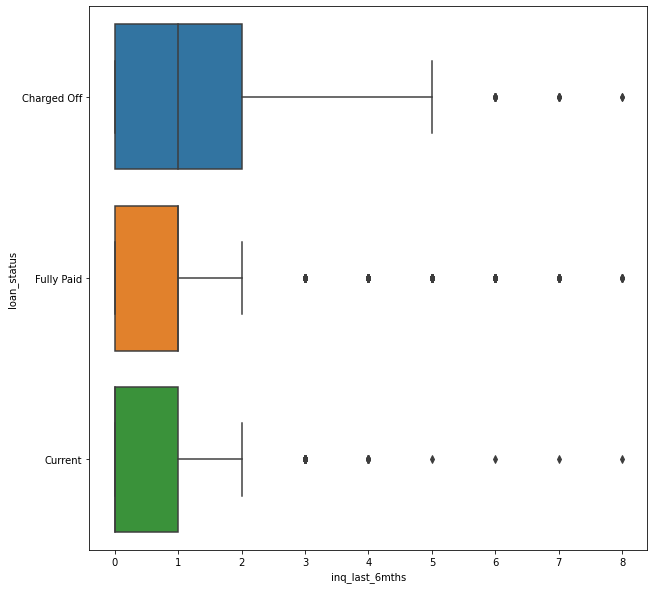

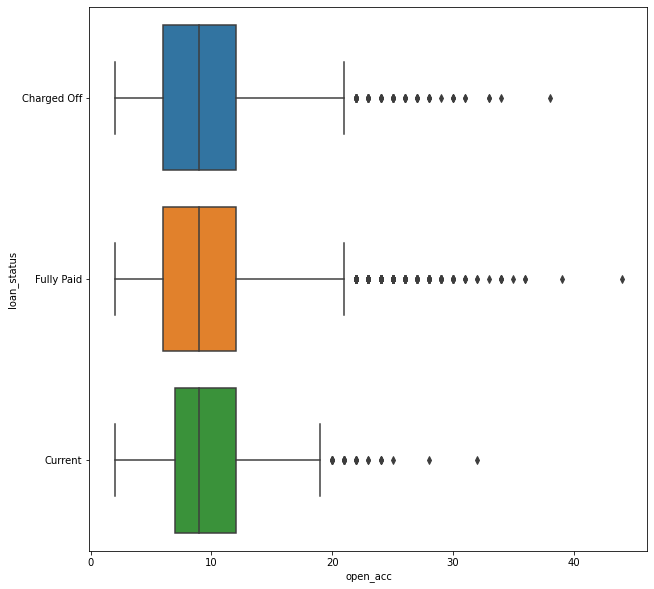

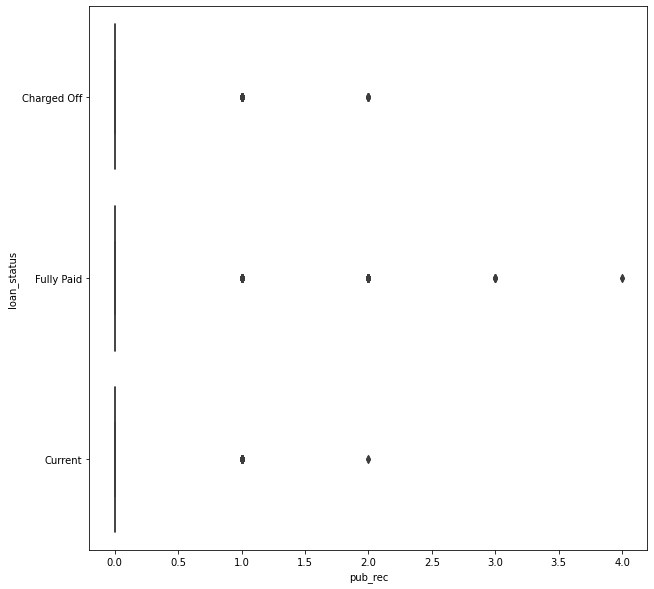

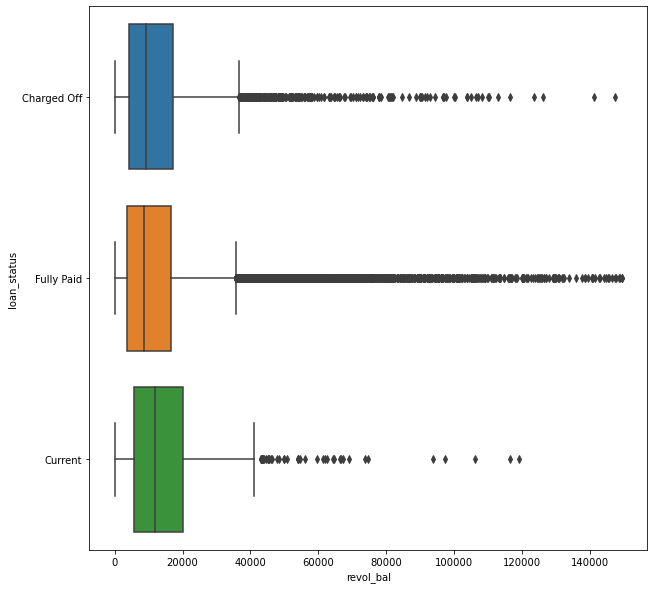

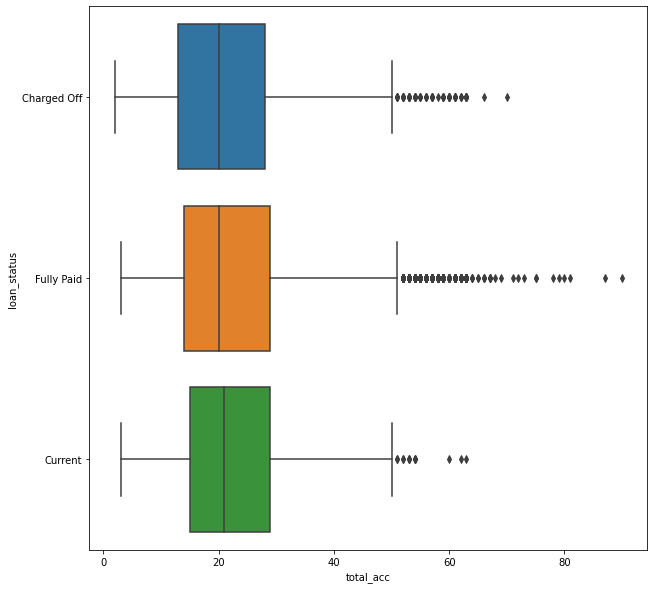

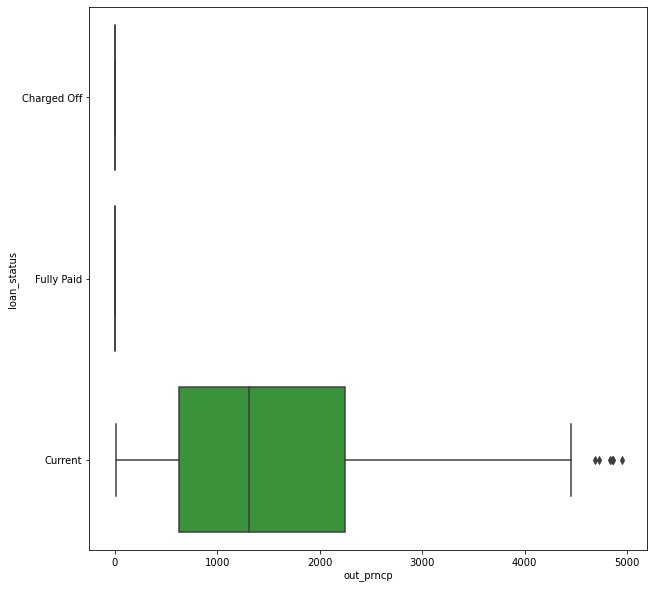

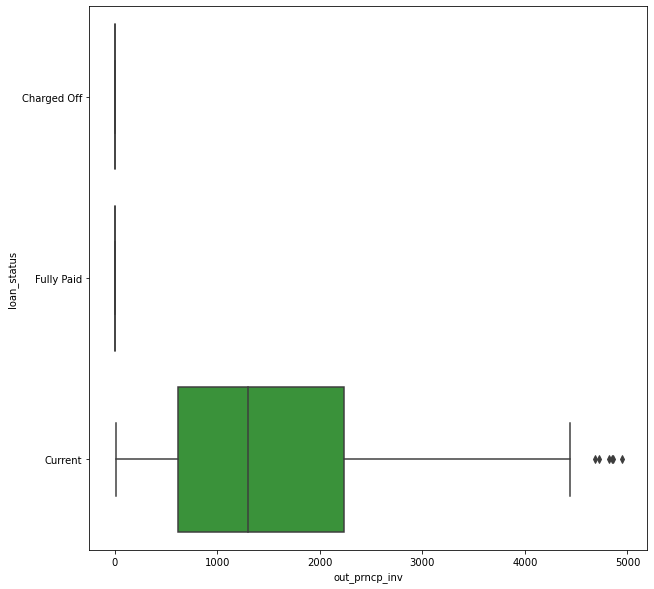

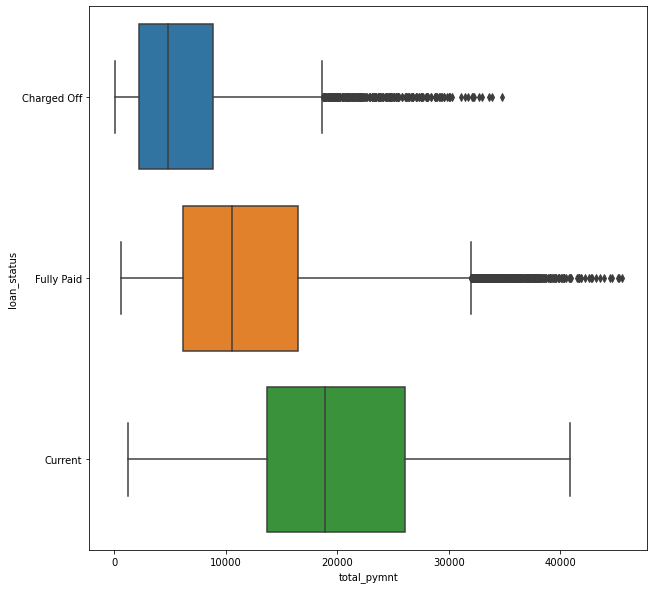

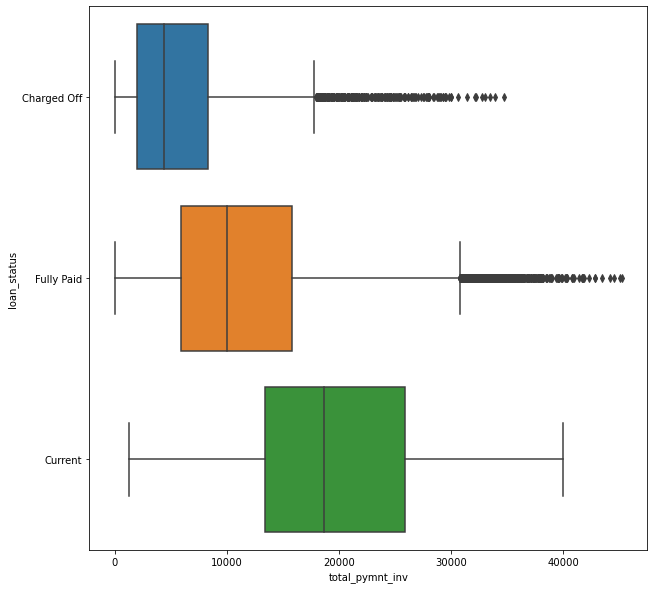

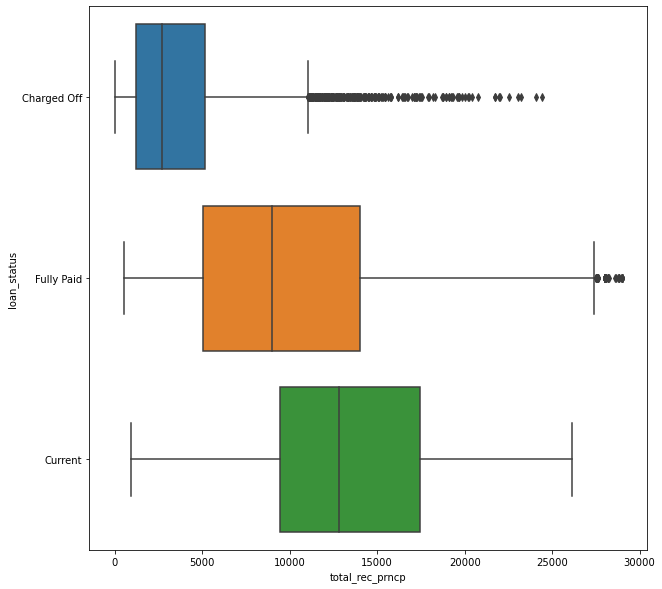

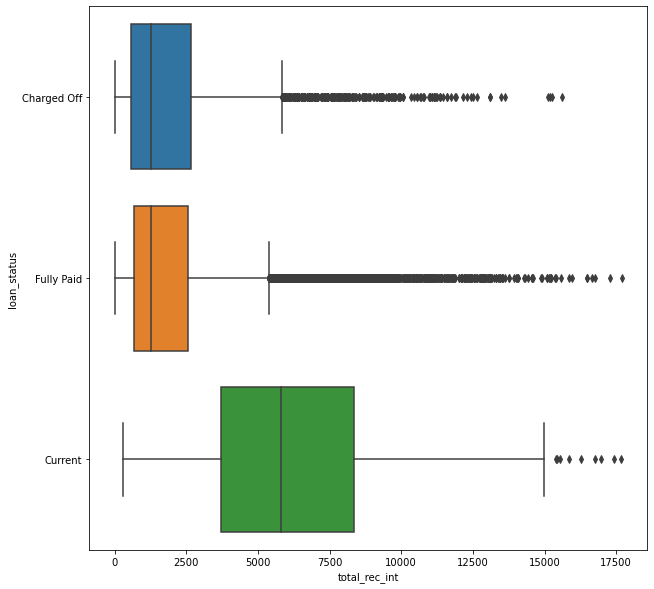

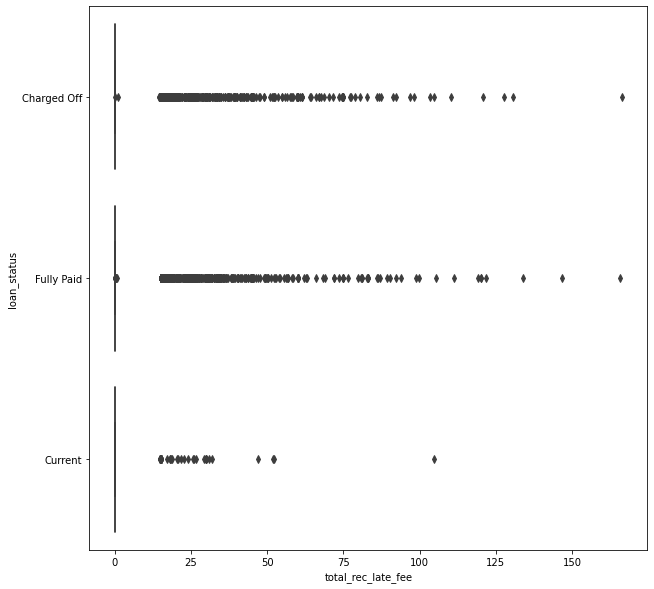

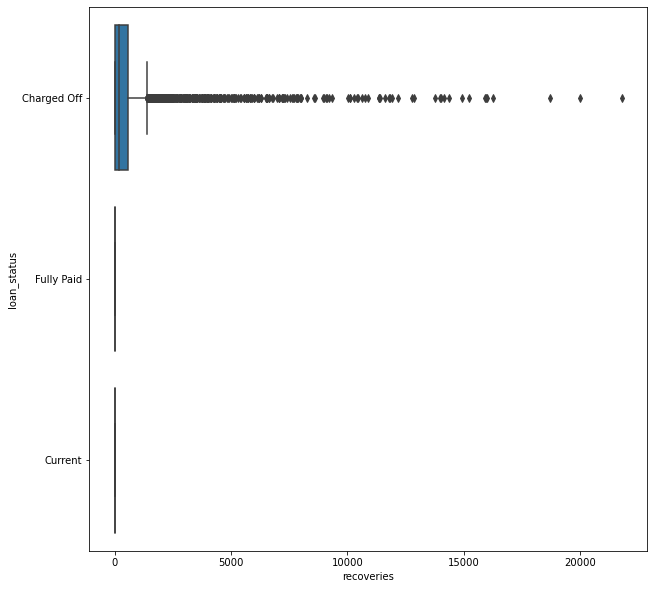

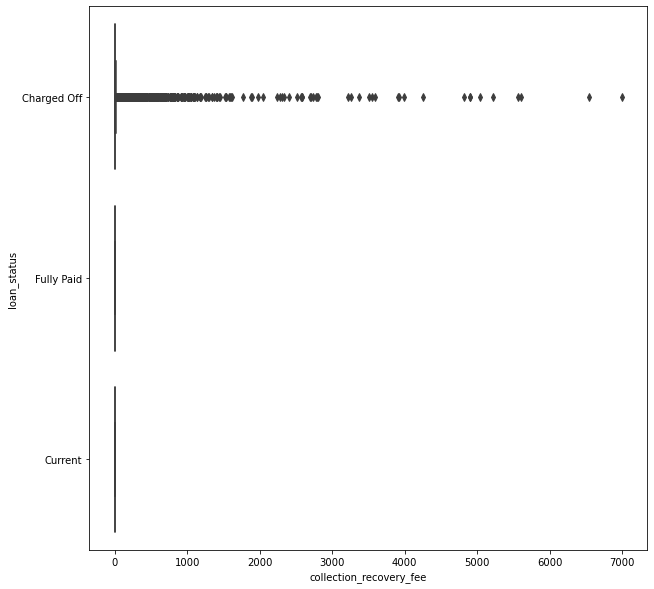

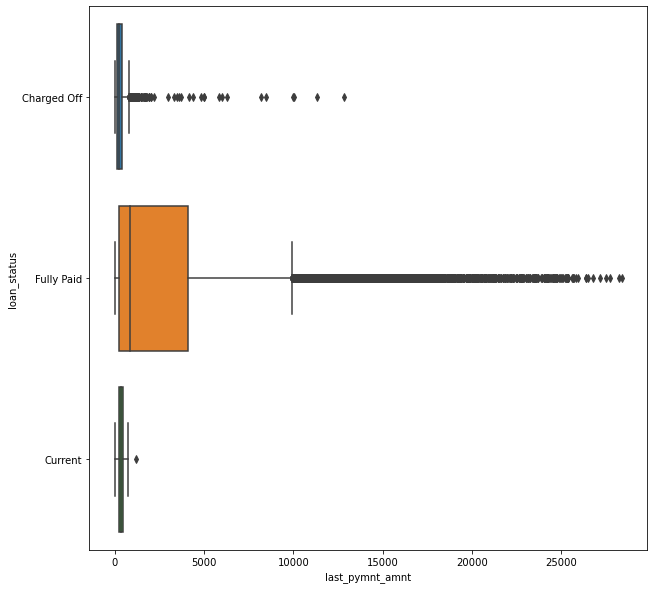

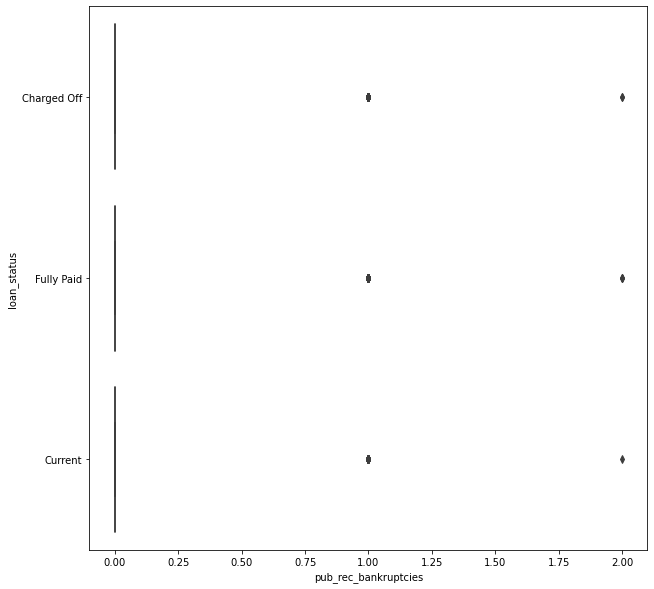

In [44]:
#Relationship of target column loan_status with numerical columns
for i in num_col:
    box_plot(df2[i],df2["loan_status"],(10,10))

## From the above boxplots and by looking at the data dictionary we can say that loan_status is fully paid or charged off depends on int_rate column, loan_amnt and inq_last_6mnths.

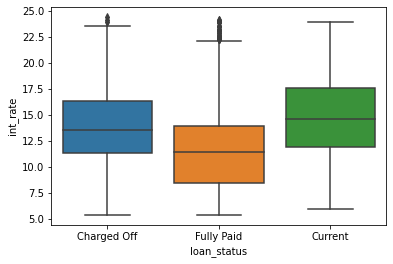

In [45]:
box_plot(df2["loan_status"],df2["int_rate"])

## From above boxplot we can say that when the interest rate is low then the probability of loan getting fully paid is higher and if the interest rate is high then mostly the loan gets charged off

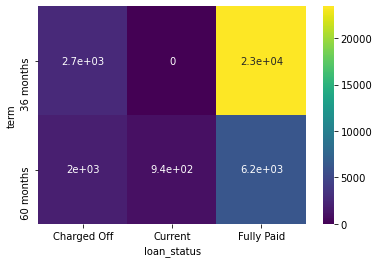

In [46]:
heat_map(df2["term"],df2["loan_status"])

## Loan for shorter term have a greater chance of getting fully paid than a loan for longer term

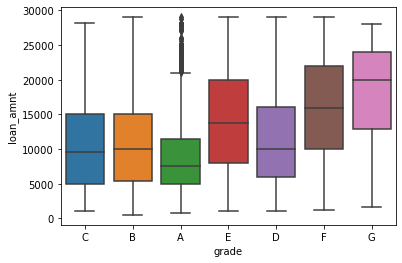

In [47]:
#We can say that with the increase in grade the loan_amt also increases.
box_plot(df2["grade"],df2["loan_amnt"])

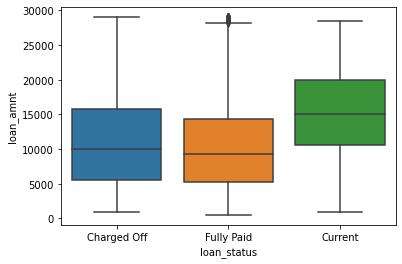

In [48]:
box_plot(df2["loan_status"],df2["loan_amnt"])

### From above boxplot diagram we can say that loan amount does not play any considerable role in deciding whether the loan will be fully paid or not

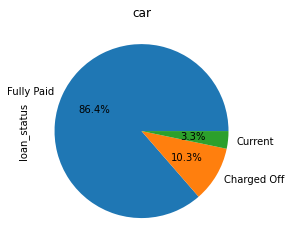

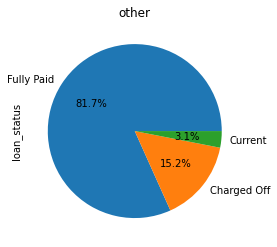

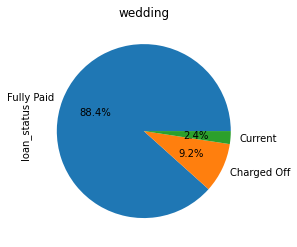

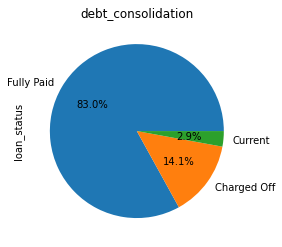

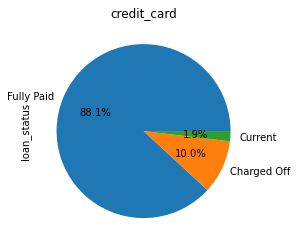

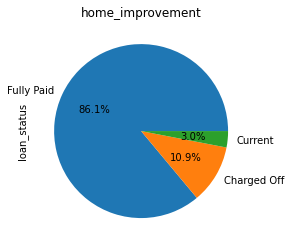

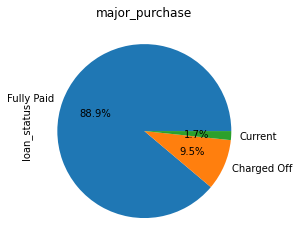

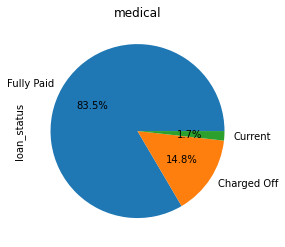

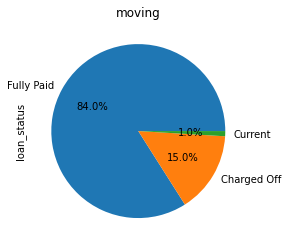

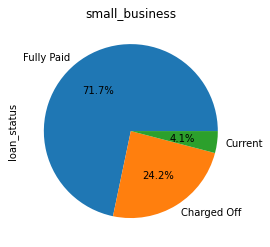

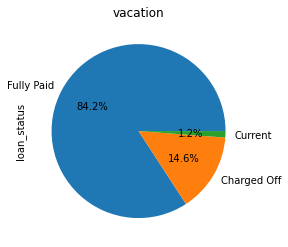

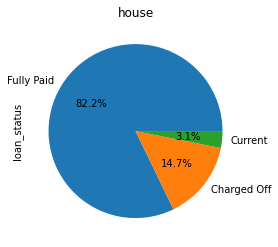

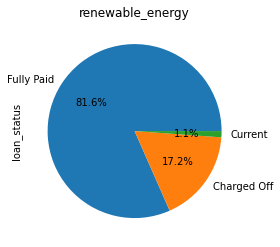

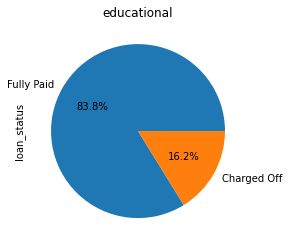

In [49]:
for pur in df2.purpose.unique():
    df2[df2["purpose"]==pur]["loan_status"].value_counts().plot.pie(autopct='%1.1f%%',title = pur)
    plt.show()

## From above piechart we can say that loan taken for the purpose of small businesses have higher chances of getting charged off whereas loan taken for major_purchase, wedding and car have good chances of getting fully paid.

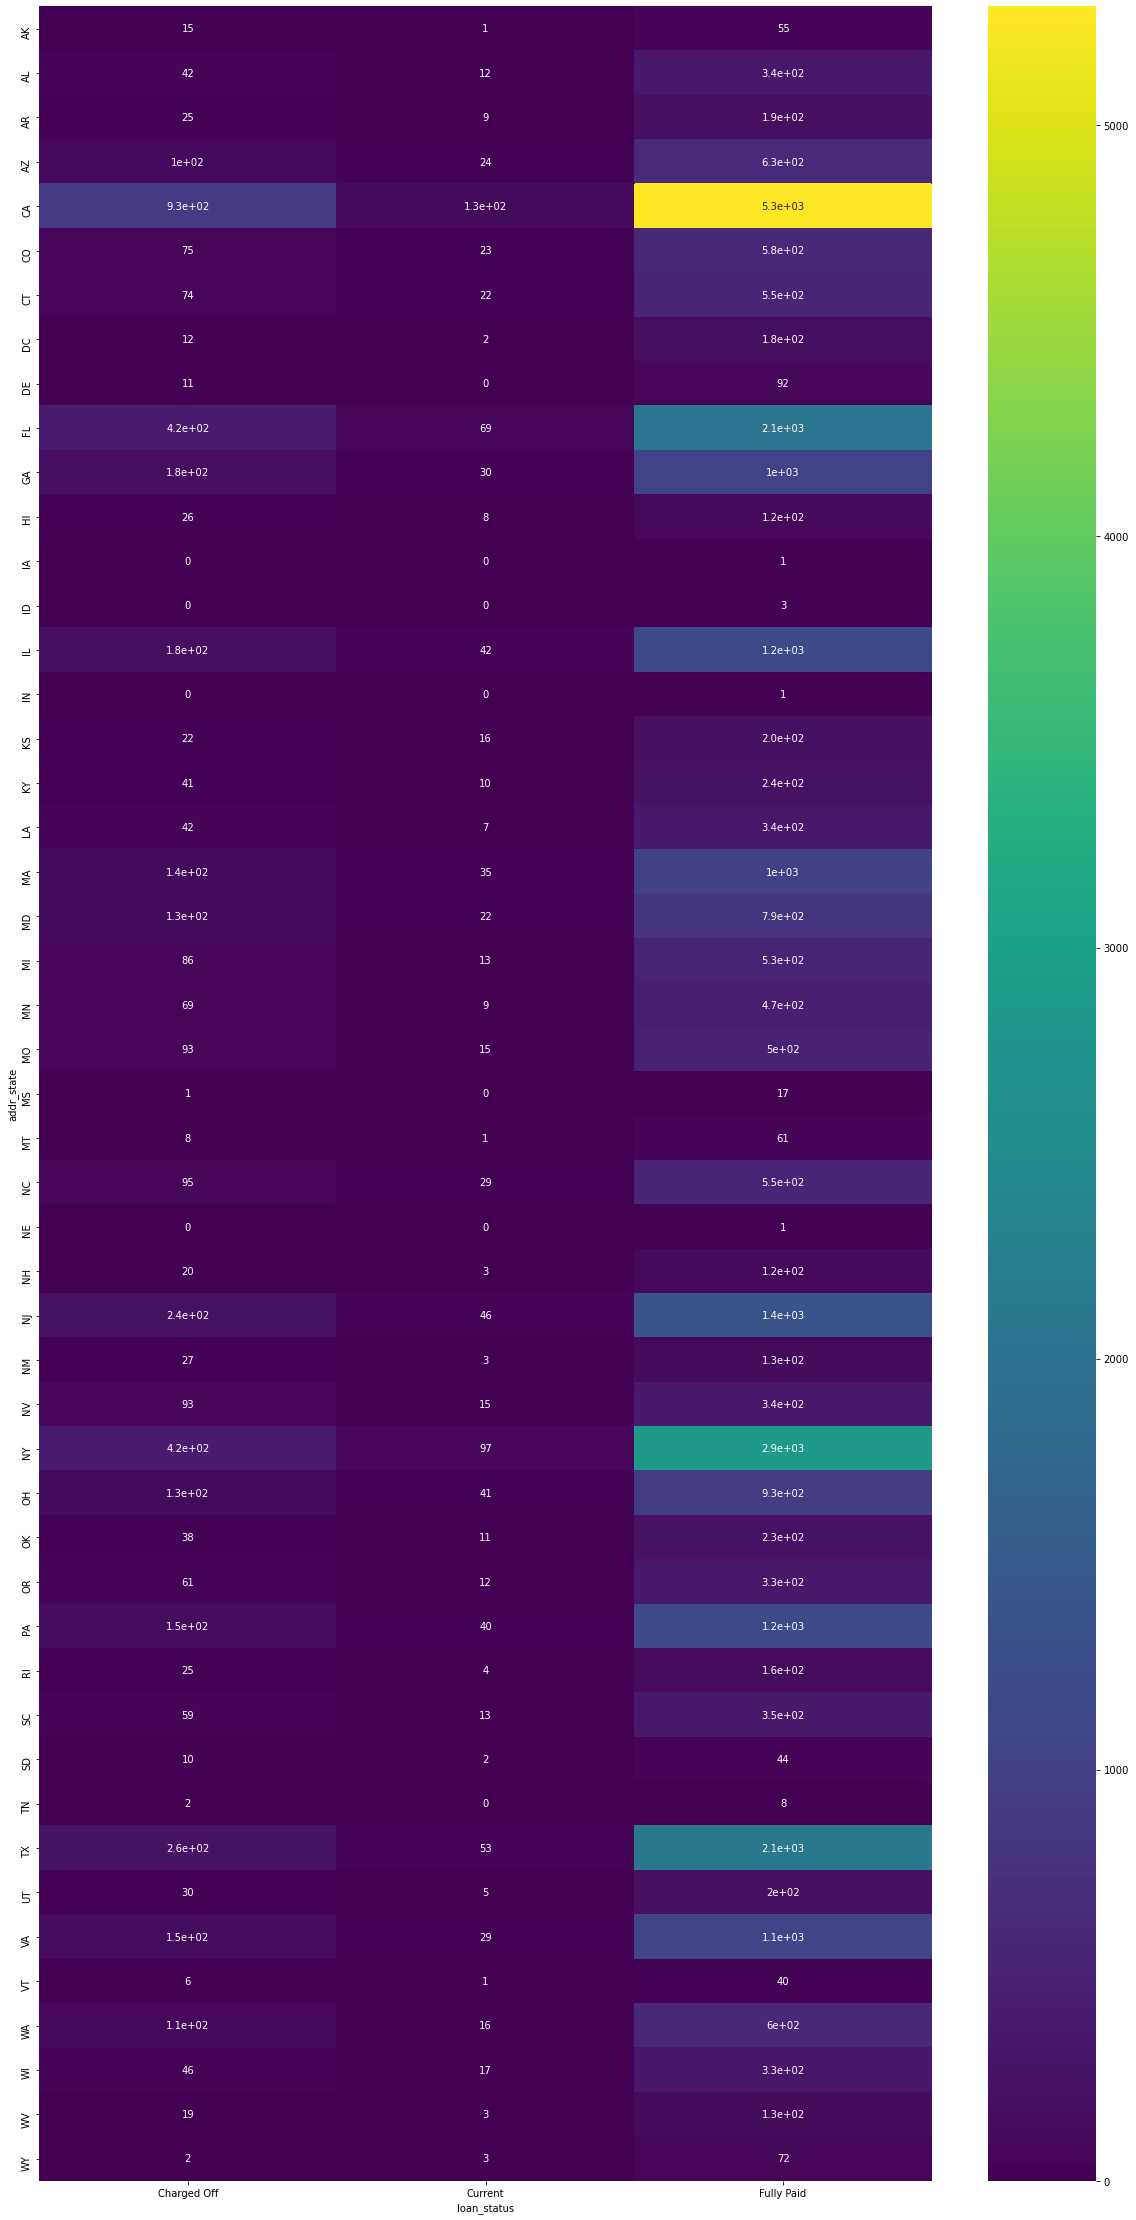

In [50]:
heat_map(df2["addr_state"],df2["loan_status"],(20,40))

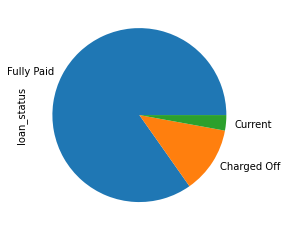

In [51]:
df2[df2["addr_state"]=="NY"]["loan_status"].value_counts().plot.pie()

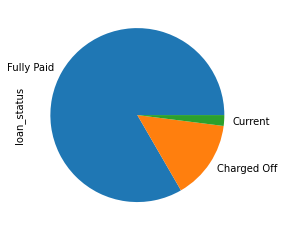

In [52]:
df2[df2["addr_state"]=="CA"]["loan_status"].value_counts().plot.pie()

## From above heatmap and pie chart we can say that loan taken in CA and NY state have a great chance of getting fully paid

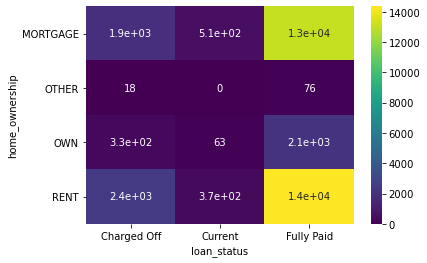

In [53]:
heat_map(df2["home_ownership"],df2["loan_status"])

## From above heatmap we can say that people living on rent and mortgage have a good probability of fully paying back the loan

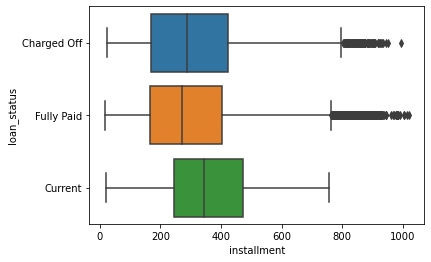

In [54]:
box_plot(df2["installment"],df2["loan_status"])

### We cannot draw any conclusion from the above boxplot

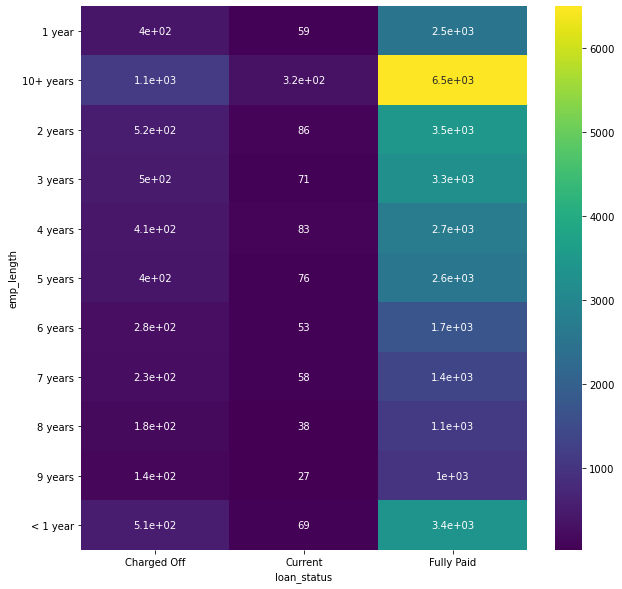

In [55]:
#heatmap
heat_map(df2["emp_length"],df2["loan_status"],(10,10))

## People with employment length greater than 10 years have a greater probablity of fully paying the loan.

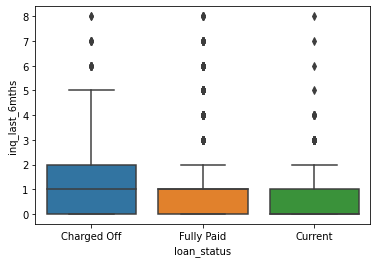

In [56]:
box_plot(df2["loan_status"],df2["inq_last_6mths"])

## From above boxplot we can say that if the inquiries in last 6 months are more then the chances of lona getting charged off is very high in comparison to loan getting fully paid. 

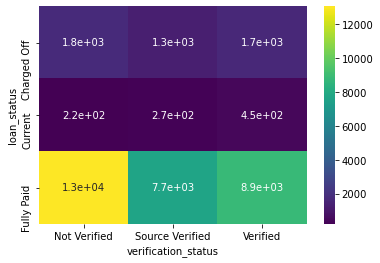

In [57]:
heat_map(df2["loan_status"], df2["verification_status"])

### From above heatmap we can say that people with verification-status not verified and people with verification status both have almost same probability of fully paying back the loan

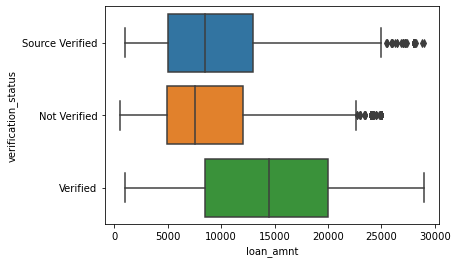

In [58]:
box_plot(df["loan_amnt"],df2["verification_status"])

## From above boxplot we can say that loan_amnt applied by the borrower for the loan with verification status verified is very much higher in comparison for loan_amnt applied by the borrower for the loan with verification status not verified.

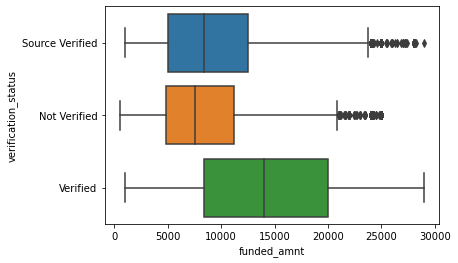

In [59]:
box_plot(df["funded_amnt"],df2["verification_status"])

## From above boxplot we can say that funded_amnt for the loan with verification status verified is very much higher in comparison for the loan with verification status not verified.

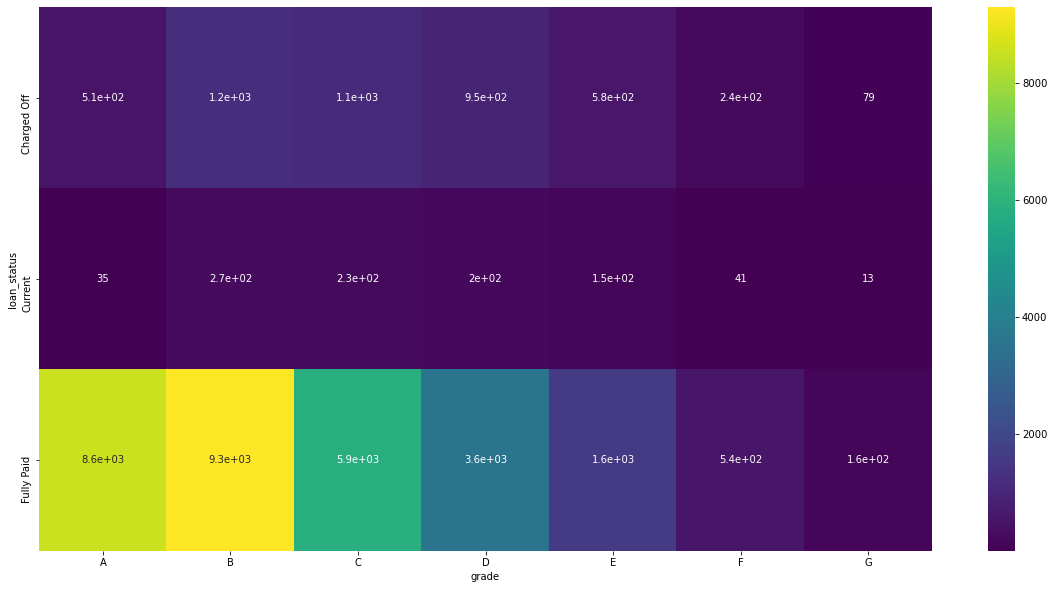

In [60]:
heat_map(df2["loan_status"], df2["grade"],(20,10))

## From above heatmap we can say that A and B grade loans have a greater chance of getting fully paid

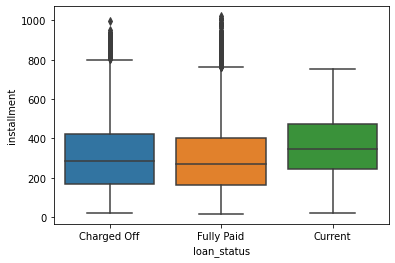

In [61]:
box_plot(df2["loan_status"],df2["installment"])

### From the above boxplot we can say that Installment amount does not have any impact on the loan_status.

## Conclusion: Some of the points that we can conclude from the data analysis are:
1) For the loans given at higher interest rate chances of loan getting charged off or not getting paid are higher compared to the loans given at low interest rate.
2) Loans given for shorter terms have higher chances of getting fully paid in comparison to the loans with higher term.
3) Loans taken for major_purchase, wedding and car purpose mostly get fully paid back.
4) Borrowers living on mortaged and rent properties mostly all the times fully pay back the loans.
5) Loans given to people who have been employed for more than 10 years have great probability of getting fully paid.